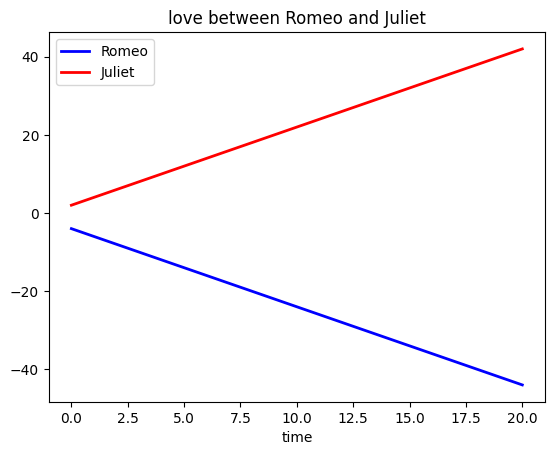

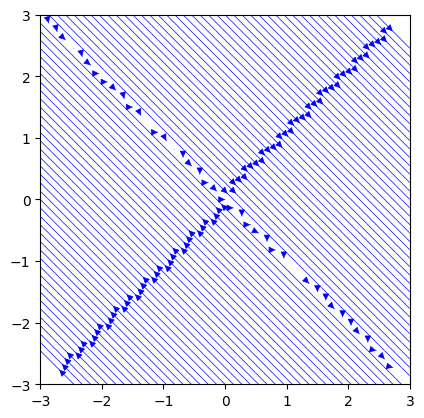

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint



def love(y, t):
    a = 1
    b = 1
    c = -1
    d = -1
    R = y[0]
    J = y[1]
    dRdt = a*R+b*J
    dJdt = c*R+d*J
    return [dRdt ,dJdt]

t = np.linspace(0,20)
y0= [-4, 2]

y = odeint(love,y0,t)

plt.plot(t,y[:,0], 'b-', linewidth = 2.0)
plt.plot(t,y[:,1],'r-', linewidth=2.0)
plt.xlabel("time")
# plt.ylabel("y[R,J]")
plt.title("love between Romeo and Juliet")
plt.legend(["Romeo","Juliet"])
plt.savefig('images/plot.png')
plt.show()


x1 = np.linspace(-3.0,3.0,30)
x2 = np.linspace(-3.0,3.0,30)
X,Y = np.meshgrid(x1,x2)
u,v = np.zeros_like(X), np.zeros_like(X)
NI, NJ= X.shape

t = 0
for i in range(NI):
    for j in range(NJ):
        x, y = X[i, j], Y[i, j]
        fp = love([x,y], t)
        u[i,j] = fp[0]
        v[i,j] = fp[1]

plt.streamplot(X, Y, u, v, color='b', linewidth=0.5, density=1.5)
plt.axis('square')
plt.axis([-3, 3, -3, 3])
plt.savefig('images/phase-portrait.png')
plt.show()



R =  0
J =  0


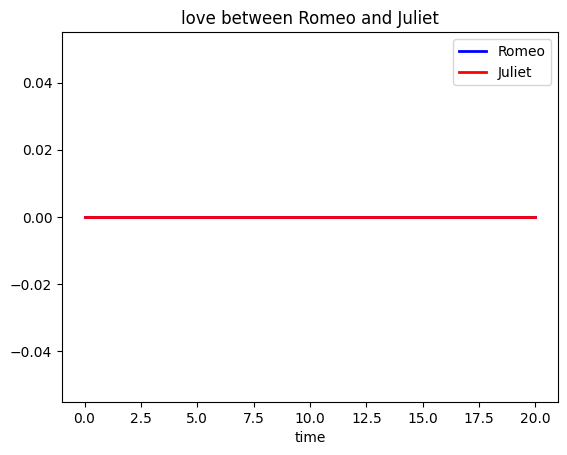

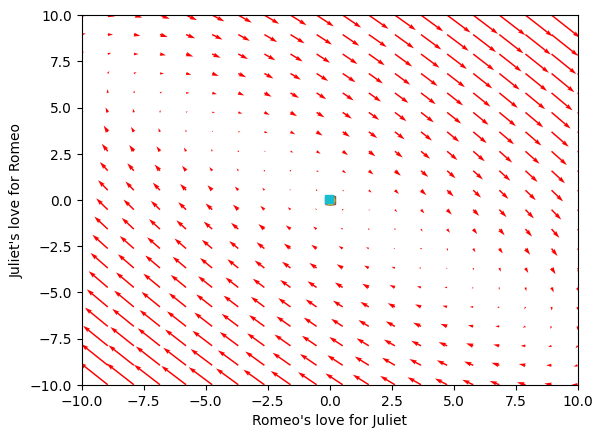

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, Function, Derivative, Eq, dsolve, solve
a = int(input("a = "))
b = int(input("b = "))
c = int(input("c = "))
d = int(input("d = "))
r0 = int(input("r0 = "))
j0 = int(input("j0 = "))

t = Symbol('t')
r = Function('r')(t)
j = Function('j')(t)
deq1 = Eq(Derivative(r), a*r + b*j)
deq2 = Eq (Derivative(j), c*r + d*j)
system = (deq1, deq2)
s = dsolve(system)
eq1 = s[0].rhs.subs(t,0) - r0
eq2 = s[1].rhs.subs(t,0) - j0
constants = solve([eq1, eq2])
r = s[0].subs(constants)
j = s[1].subs(constants)
r = r.rhs
j = j.rhs
print("R = ", r)
print("J = ", r)


def love(y, t):
    
    R = y[0]
    J = y[1]
    dRdt = a*R+b*J
    dJdt = c*R+d*J
    return [dRdt ,dJdt]

t = np.linspace(0,20)
y0= [r0, j0]

y = odeint(love,y0,t)



plt.plot(t,y[:,0], 'b-', linewidth = 2.0)
plt.plot(t,y[:,1],'r-', linewidth=2.0)
plt.xlabel("time")
# plt.ylabel("y[R,J]")
plt.title("love between Romeo and Juliet")
plt.legend(["Romeo","Juliet"])
plt.savefig('images/plot.png')
plt.show()

y1 = np.linspace(-10, 10, 20)
y2 = np.linspace(-10, 10, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = love([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('Romeo\'s love for Juliet')
plt.ylabel('Juliet\'s love for Romeo')
plt.xlim([-10, 10])
plt.ylim([-10, 10])


for y20 in [0, 0.01, 0.02, -0.01, -0.02]:
    tspan = np.linspace(0, 50, 200)
    y0 = [0, y20]
    ys = odeint(love, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.savefig('images/phase-portrait-2.png')
plt.show()

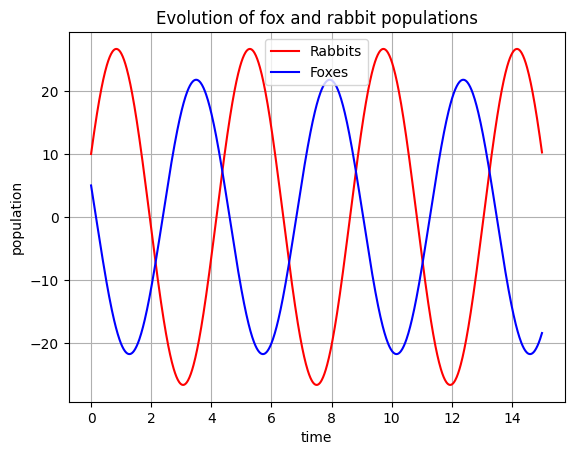

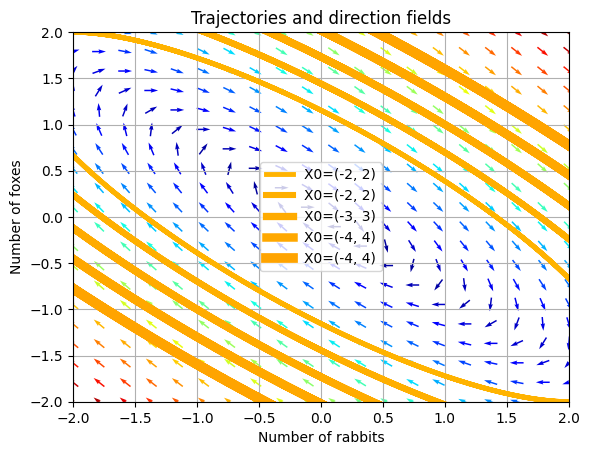

In [10]:
#!python
from numpy import *
import pylab as p
# Definition of parameters
a = 2
b = 3
c = -2
d = -2
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ a*X[0] +   b*X[1] ,
                  c*X[0] + d*X[1] ])


#!python
from scipy import integrate
t = linspace(0, 15,  1000)              # time
X0 = array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'
X_f1 = array([ -2,2])
#!python
rabbits, foxes = X.T
f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Rabbits')
p.plot(t, foxes  , 'b-', label='Foxes')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of fox and rabbit populations')
f1.savefig('rabbits_and_foxes_1.png')

values  = linspace(0.1, 1, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1.))  # colors for each trajectory

f2 = p.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(-2, 2, 20)
y = linspace(-2, 2, 20)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.legend()
p.grid()
p.xlim(-2 ,2)
p.ylim(-2 ,2)
f2.savefig('rabbits_and_foxes_2.png')